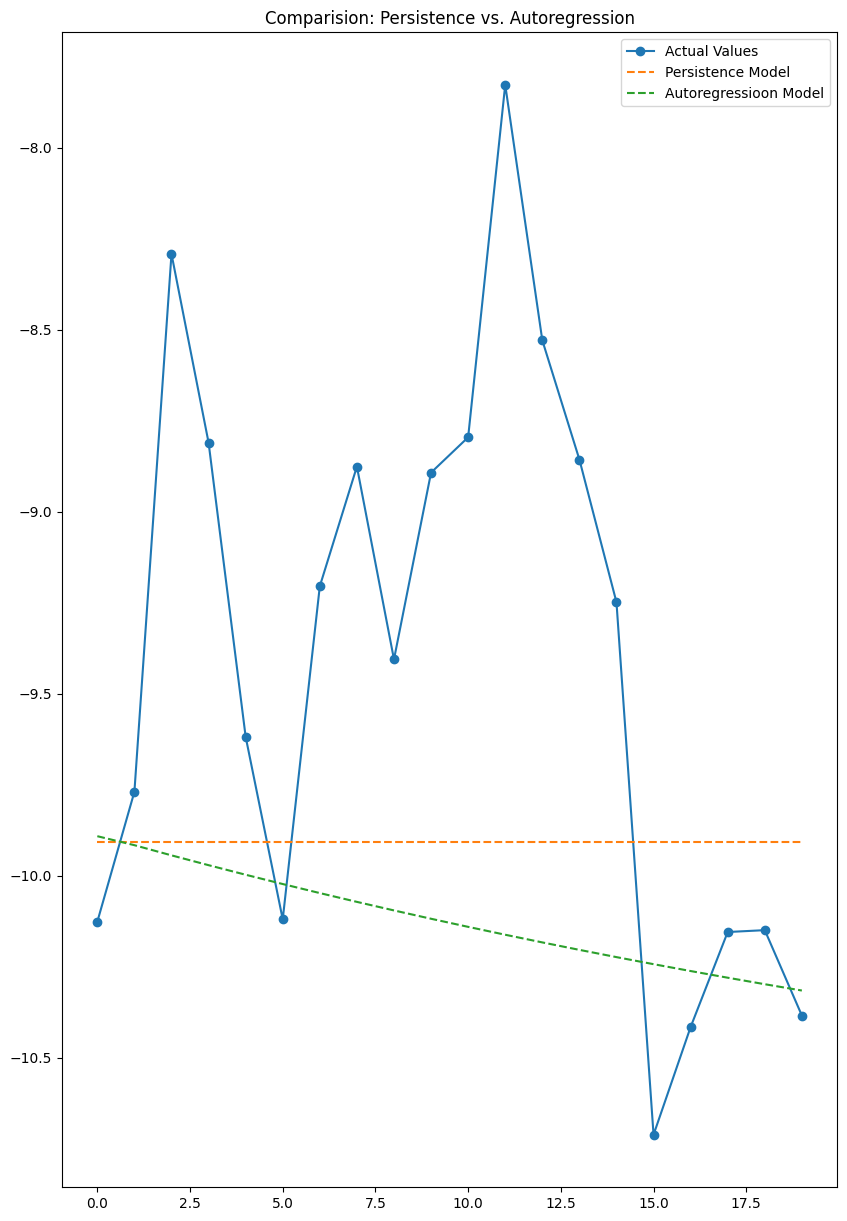

Persistence Model RMSE: 0.925
Autoregression Model RMSE: 1.036


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

# Generating synthetic time series data (random walk)
np.random.seed(42)
n = 100
data = np.cumsum(np.random.randn(n)) # Cummulative sum to simulate a trend

# Split data into train and test sets 
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# --------------------------------------------------

# 1. Persistence Model (Naive Forecast)
# ------------------------------------------------

def persistence_forecast(test, last_train_value):
    predictions = [last_train_value] * len(test)
    return predictions

# Persistence predictions (using last value)
persistence_preds = persistence_forecast(test, train[-1])

# Calculate RMSE
persistence_rmse = np.sqrt(mean_squared_error(test, persistence_preds))

# ---------------------------
# 2. Autoregression Model (AR)

# -----------------------------

lag = 3 # Using 3 previous values
ar_model = AutoReg(train, lags=lag).fit()
ar_preds = ar_model.predict(start=len(train), end=len(data)-1)

# ---------------------------------
ar_rmse = np.sqrt(mean_squared_error(test, ar_preds))

# ---------------------------------------------------------------
# Plot results 
# -----------------------------------------
plt.figure(figsize=(10,15))
plt.plot(test,label="Actual Values", marker='o')
plt.plot(persistence_preds, label="Persistence Model", linestyle='dashed')
plt.plot(ar_preds, label="Autoregressioon Model", linestyle='dashed')
plt.legend()
plt.title("Comparision: Persistence vs. Autoregression")
plt.show()

# Print RMSE values
print(f"Persistence Model RMSE: {persistence_rmse:.3f}")
print(f"Autoregression Model RMSE: {ar_rmse:.3f}")

In [3]:
print(persistence_rmse)

0.9246586762666911


In [4]:
persistence_forecast(test, train)

[array([  0.49671415,   0.35844985,   1.00613839,   2.52916825,
          2.29501487,   2.06087791,   3.64009073,   4.40752546,
          3.93805107,   4.48061112,   4.01719342,   3.55146367,
          3.79342594,   1.8801457 ,   0.15522787,  -0.40705966,
         -1.41989078,  -1.10564345,  -2.01366753,  -3.42597123,
         -1.96032246,  -2.18609876,  -2.11857056,  -3.54331874,
         -4.08770147,  -3.97677888,  -5.12777245,  -4.75207444,
         -5.35271313,  -5.64440688,  -6.24611349,  -4.3938353 ,
         -4.40733253,  -5.46504346,  -4.64249854,  -5.86334219,
         -5.6544786 ,  -7.61414872,  -8.94233477,  -8.74547354,
         -8.00700696,  -7.83563868,  -7.95128696,  -8.25239065,
         -9.73091264, -10.45075685, -10.91139562,  -9.8542734 ,
         -9.51065511, -11.27369526, -10.94961129, -11.33469357,
        -12.01161557, -11.39993929, -10.36893976,  -9.43765964,
        -10.27687717, -10.58608954, -10.25482611,  -9.27928098,
         -9.75845522,  -9.9441142 , -11.

In [27]:
# ar me hm lag values define krte hai

# Code for ACF and PACF

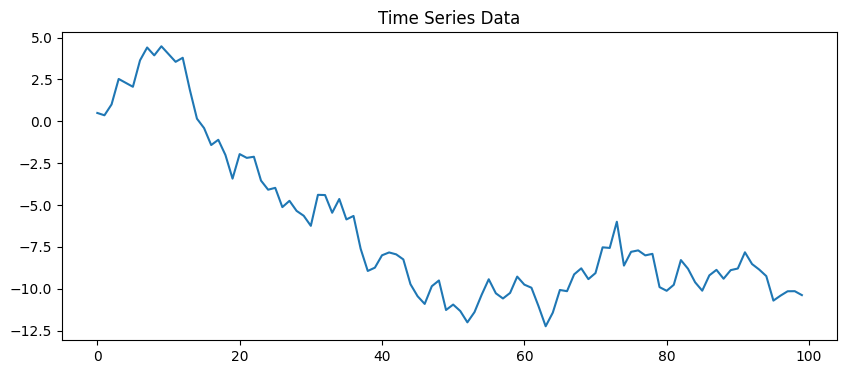

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic time series data (random walk)
np.random.seed(42)
n = 100
data = np.cumsum(np.random.randn(n)) # Cumulative sum to simulate a trend

# Plot time series data 
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title("Time Series Data")
plt.show()

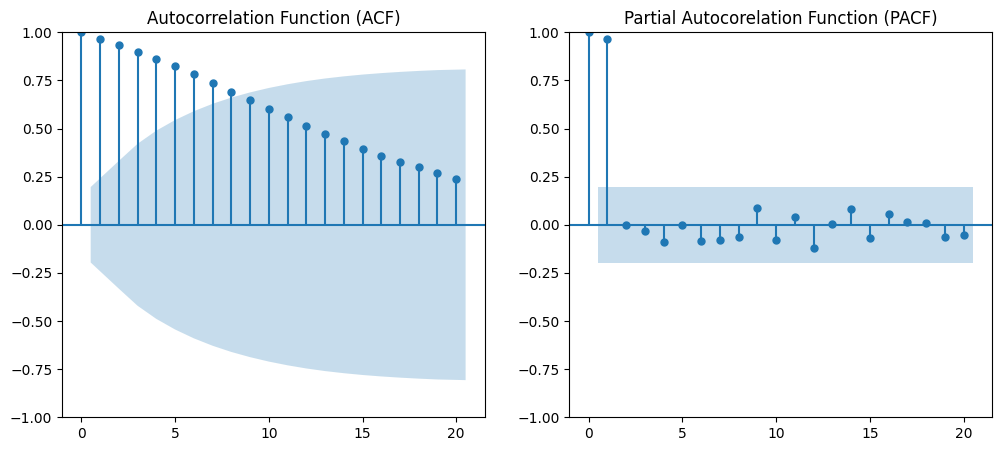

In [6]:
# Plot ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot 
sm.graphics.tsa.plot_acf(data, lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
                  
# PACF Plot
sm.graphics.tsa.plot_pacf(data, lags=20, ax=axes[1])
axes[1].set_title("Partial Autocorelation Function (PACF)")

plt.show()

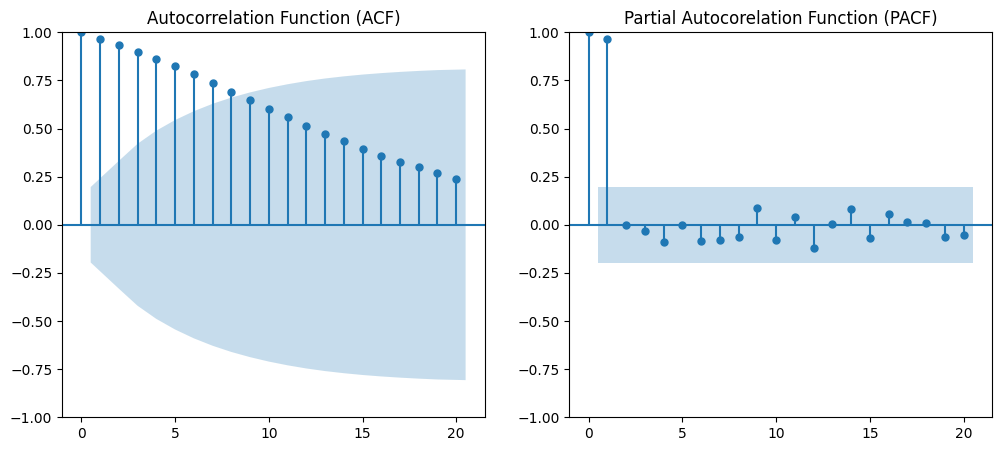

In [7]:
# Plot ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot 
sm.graphics.tsa.plot_acf(data, lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
                  
# PACF Plot
sm.graphics.tsa.plot_pacf(data, lags=20, ax=axes[1])
axes[1].set_title("Partial Autocorelation Function (PACF)")

plt.show()

# Explanation

In [11]:
#  Shaded area confidence interval dikhata hai; iske andar jo lags aate hain, wo statistically insignificant hote hain, yani unka effect random noise ho sakta hai.
    

In [12]:

# Confidence interval batata hai ki random fluctuations aur actual correlation me kya difference hai.

# Agar koi lag ka spike shaded area ke andar hai, to uska correlation random noise ho sakta hai.
# Agar spike shaded area ke bahar hai, to correlation significant hai, yani us lag ka time series pe real impact ho sakta hai.

In [13]:
# ar => very long changes
# persistence = stable